# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + (city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | mili
Processing Record 3 of Set 1 | amarkantak
Processing Record 4 of Set 1 | nagireddipalli
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | rongelap
Processing Record 7 of Set 1 | la passe
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | arkhangel'sk
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | takamaka
City not found. Skipping...
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | vadso
Processing Record 14 of Set 1 | kenai
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | nanlong
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | san jose village
City not found. Skipping...
Processing Record 21 of Set 1 | i

Processing Record 39 of Set 4 | muntok
Processing Record 40 of Set 4 | ondjiva
Processing Record 41 of Set 4 | island harbour
Processing Record 42 of Set 4 | ulladulla
Processing Record 43 of Set 4 | guantanamo
Processing Record 44 of Set 4 | al fallujah
Processing Record 45 of Set 4 | santarem
Processing Record 46 of Set 4 | mirnyy
Processing Record 47 of Set 4 | faya-largeau
Processing Record 48 of Set 4 | darwin
Processing Record 49 of Set 4 | usinsk
Processing Record 0 of Set 5 | tsiolkovskiy
City not found. Skipping...
Processing Record 1 of Set 5 | badger
Processing Record 2 of Set 5 | quellon
Processing Record 3 of Set 5 | hatillo
Processing Record 4 of Set 5 | standerton
Processing Record 5 of Set 5 | bilibino
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | vilyuchinsk
Processing Record 8 of Set 5 | tadine
Processing Record 9 of Set 5 | carnarvon
Processing Record 10 of Set 5 | kargasok
Processing Record 11 of Set 5 | castillos
Processing Record 12 of Set 

Processing Record 26 of Set 8 | santana
Processing Record 27 of Set 8 | pangoa
Processing Record 28 of Set 8 | tolanaro
Processing Record 29 of Set 8 | paracuru
Processing Record 30 of Set 8 | setakamachi-takayanagi
Processing Record 31 of Set 8 | santiago del torno
Processing Record 32 of Set 8 | nogliki
Processing Record 33 of Set 8 | aleksandrovsk-sakhalinskiy
Processing Record 34 of Set 8 | nova sintra
Processing Record 35 of Set 8 | aripuana
Processing Record 36 of Set 8 | san jose del guaviare
Processing Record 37 of Set 8 | cakovec
Processing Record 38 of Set 8 | duong dong
Processing Record 39 of Set 8 | fortuna
Processing Record 40 of Set 8 | kavaratti
Processing Record 41 of Set 8 | camalu
Processing Record 42 of Set 8 | sandnessjoen
Processing Record 43 of Set 8 | nainwa
Processing Record 44 of Set 8 | kerema
Processing Record 45 of Set 8 | fort st. john
Processing Record 46 of Set 8 | labrador city
Processing Record 47 of Set 8 | kiffa
Processing Record 48 of Set 8 | miyano

Processing Record 13 of Set 12 | havre
Processing Record 14 of Set 12 | khurja
Processing Record 15 of Set 12 | igrim
Processing Record 16 of Set 12 | mangrol
Processing Record 17 of Set 12 | nizhneangarsk
Processing Record 18 of Set 12 | labytnangi
Processing Record 19 of Set 12 | natal
Processing Record 20 of Set 12 | olyokminsk
Processing Record 21 of Set 12 | arno
Processing Record 22 of Set 12 | chandia
Processing Record 23 of Set 12 | leeds
Processing Record 24 of Set 12 | queenstown
Processing Record 25 of Set 12 | severo-yeniseyskiy
Processing Record 26 of Set 12 | vila velha
Processing Record 27 of Set 12 | santa cruz de yojoa
Processing Record 28 of Set 12 | kisangani
Processing Record 29 of Set 12 | visby
Processing Record 30 of Set 12 | palmer
Processing Record 31 of Set 12 | trairi
Processing Record 32 of Set 12 | crane
Processing Record 33 of Set 12 | dompu
Processing Record 34 of Set 12 | vicam
Processing Record 35 of Set 12 | qarazhal
Processing Record 36 of Set 12 | en

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,22.50,57,84,7.32,MU,1691542864
1,mili,6.0815,171.7350,28.16,79,96,6.51,MH,1691543283
2,amarkantak,22.6667,81.7500,19.63,86,100,1.41,IN,1691543283
3,nagireddipalli,14.2667,79.1000,27.16,67,100,2.01,IN,1691543283
4,west island,-12.1568,96.8225,24.99,83,40,5.66,CC,1691542603


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,22.50,57,84,7.32,MU,1691542864
1,mili,6.0815,171.7350,28.16,79,96,6.51,MH,1691543283
2,amarkantak,22.6667,81.7500,19.63,86,100,1.41,IN,1691543283
3,nagireddipalli,14.2667,79.1000,27.16,67,100,2.01,IN,1691543283
4,west island,-12.1568,96.8225,24.99,83,40,5.66,CC,1691542603


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

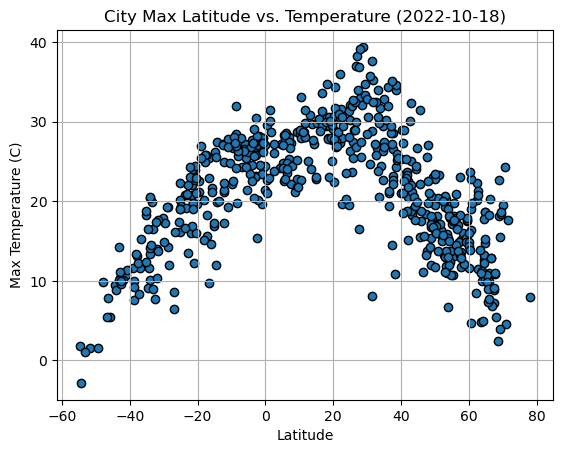

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", edgecolor="black")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE